In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
xs = np.arange(1, 100, 0.1)

In [3]:
ys = np.sin(xs) - np.random.rand(len(xs))

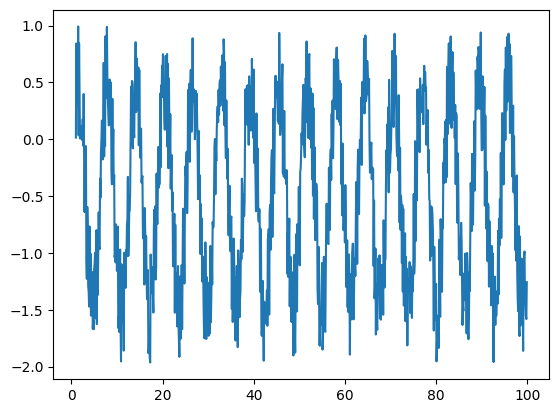

In [5]:
plt.plot(xs, ys)

In [6]:
ys

array([ 1.52372235e-02,  8.42803168e-01,  2.91619980e-01,  6.36743293e-01,
        3.41548807e-01,  9.92600824e-01,  3.41605926e-02,  8.44274966e-01,
        3.74624671e-01,  7.29399283e-03,  1.05173521e-01,  7.10093606e-02,
        1.12837773e-01, -3.79782561e-03,  3.62689430e-02,  1.78068906e-01,
       -5.80466169e-02,  3.98347486e-01, -1.88420124e-01, -6.40546070e-01,
       -2.02504907e-01, -1.73723979e-01, -5.99549111e-02, -1.06472878e+00,
       -1.22836310e+00, -5.96296263e-01, -7.84066838e-01, -1.29047165e+00,
       -1.34011908e+00, -1.47219115e+00, -7.67407837e-01, -1.44854913e+00,
       -1.00581552e+00, -1.55217267e+00, -1.34393357e+00, -1.38208125e+00,
       -1.16846859e+00, -1.66665928e+00, -1.59142629e+00, -1.67178726e+00,
       -1.14295191e+00, -1.09804952e+00, -9.99786508e-01, -1.57549194e+00,
       -1.28767379e+00, -7.99745354e-01, -1.62633055e+00, -8.41142861e-01,
       -1.37033466e+00, -9.74936431e-01, -6.43563289e-01, -9.41492291e-01,
       -9.66993745e-01, -

In [7]:
def sequence(data, prev):

    iterable = [data[i:] for i in range(prev + 1)]

    a = [k[:-1] for k in zip(*iterable)]
    b = [k[-1] for k in zip(*iterable)]


    a = np.array(a)
    b = np.array(b)

    b = b.reshape(-1, 1)

    return a, b

In [1]:
def difference(data):
    return [k[1] - k[0] for k in zip(data, data[1:])]

In [9]:
d = difference(ys)

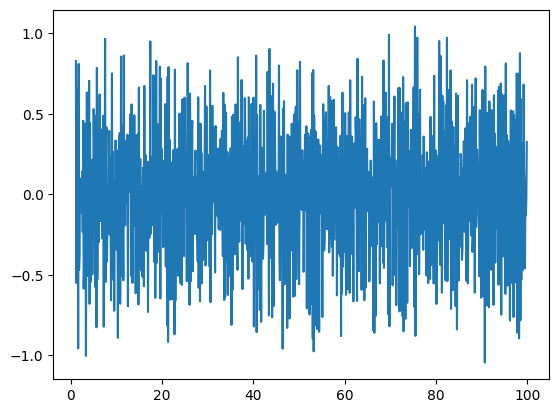

In [10]:
plt.plot(xs[1:], d)

In [11]:
x, y = sequence(d, 40)

In [12]:
x[:5]

array([[ 0.82756594, -0.55118319,  0.34512331, -0.29519449,  0.65105202,
        -0.95844023,  0.81011437, -0.46965029, -0.36733068,  0.09787953,
        -0.03416416,  0.04182841, -0.1166356 ,  0.04006677,  0.14179996,
        -0.23611552,  0.4563941 , -0.58676761, -0.45212595,  0.43804116,
         0.02878093,  0.11376907, -1.00477386, -0.16363432,  0.63206683,
        -0.18777057, -0.50640481, -0.04964743, -0.13207207,  0.70478331,
        -0.68114129,  0.44273361, -0.54635715,  0.20823909, -0.03814767,
         0.21361265, -0.49819069,  0.075233  , -0.08036097,  0.52883535],
       [-0.55118319,  0.34512331, -0.29519449,  0.65105202, -0.95844023,
         0.81011437, -0.46965029, -0.36733068,  0.09787953, -0.03416416,
         0.04182841, -0.1166356 ,  0.04006677,  0.14179996, -0.23611552,
         0.4563941 , -0.58676761, -0.45212595,  0.43804116,  0.02878093,
         0.11376907, -1.00477386, -0.16363432,  0.63206683, -0.18777057,
        -0.50640481, -0.04964743, -0.13207207,  0.

In [13]:
y[:5]

array([[ 0.04490239],
       [ 0.09826301],
       [-0.57570543],
       [ 0.28781815],
       [ 0.48792844]])

In [14]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

2024-08-02 02:48:12.903078: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-02 02:48:12.904692: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-02 02:48:12.936956: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-02 02:48:12.937552: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-02 02:48:13.612924: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [15]:
model = Sequential()

model.add(Dense(64, input_dim=x.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

In [16]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2624      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,009
Trainable params: 11,009
Non-trainable params: 0
_________________________________________________________________


In [17]:
train_size = round(0.75 * len(x))
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [18]:
history = model.fit(x_train, y_train, validation_split=0.08, epochs = 100)

Epoch 1/100
21/21 [==============================] - 1s 7ms/step - loss: 0.1766 - mae: 0.3468 - val_loss: 0.2126 - val_mae: 0.3846
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1424 - mae: 0.3094 - val_loss: 0.2028 - val_mae: 0.3713
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1226 - mae: 0.2875 - val_loss: 0.1942 - val_mae: 0.3619
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1053 - mae: 0.2687 - val_loss: 0.1862 - val_mae: 0.3586
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0912 - mae: 0.2495 - val_loss: 0.1766 - val_mae: 0.3455
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0774 - mae: 0.2300 - val_loss: 0.1732 - val_mae: 0.3372
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0689 - mae: 0.2128 - val_loss: 0.1746 - val_mae: 0.3342
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0603 - m

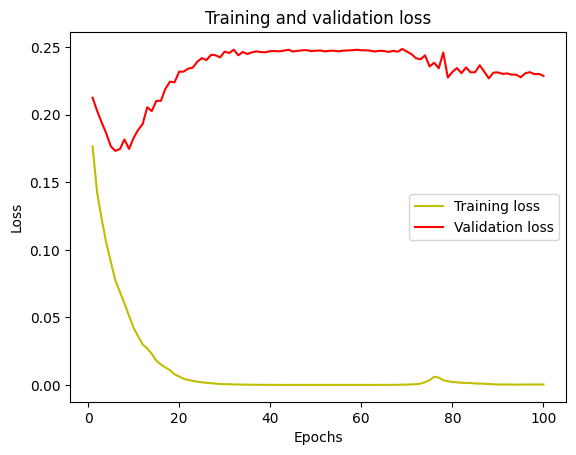

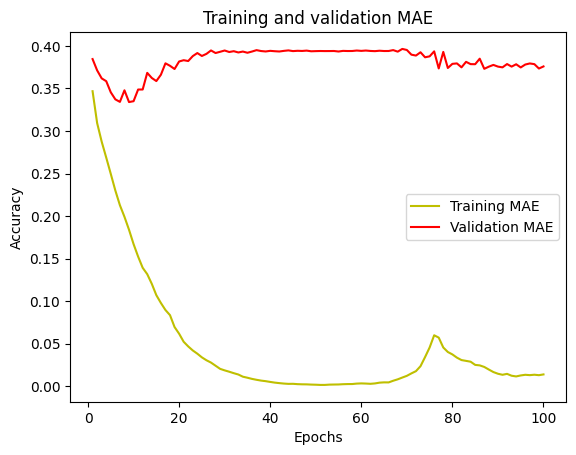

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
y_pred = model.predict(x_test)

8/8 [==============================] - 0s 962us/step


In [22]:
xs = np.arange(0, len(y_pred), 1)

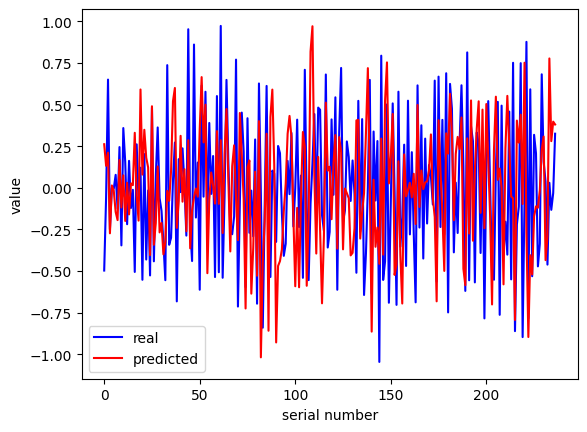

In [23]:
plt.plot(xs, y_test, color = 'blue', label = 'real')
plt.plot(xs, y_pred, color = 'red', label = 'predicted')
plt.xlabel('serial number')
plt.ylabel('value')

plt.legend()

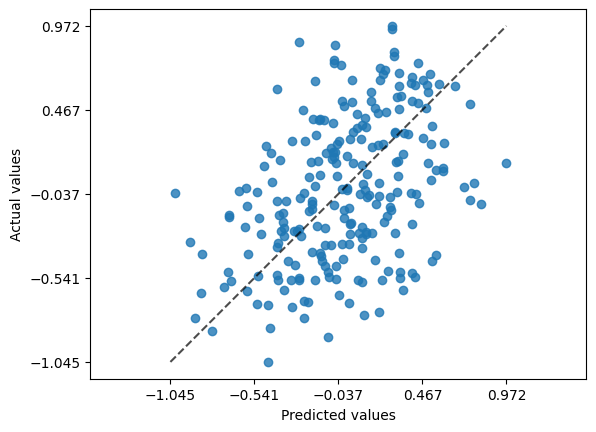

R2 Score: -0.017261732058197365
Mean Absolute Error: 0.35989290577099126
Mean Squared Error: 0.1923528747488456
Mean Absolute Percentage Error: 4.826841448064677
Mean Absolute Error: 0.3084810934945815
Explained Varaince Score: -0.01685979015938366


In [26]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score

import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay


display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred)
display.plot(kind="actual_vs_predicted")
plt.show()

print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}")
print(f"Mean Absolute Error: {median_absolute_error(y_test, y_pred)}")
print(f"Explained Varaince Score: {explained_variance_score(y_test, y_pred)}")